In [42]:
import json
from collections import Counter
from datetime import datetime
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
review = pd.read_json("E:/nethari/Downloads/YEAR 3/Deep Learning/dataset files/yelp_academic_dataset_review.json", chunksize = 20000, lines= True)

In [58]:
review_chunk = next(review)
print(review_chunk.head())

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   

                                                text                date  
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delicious.

In [59]:
review_df = pd.DataFrame(review_chunk)
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [60]:
#will use userid,business id, stars and date columns
review_df=review_df.drop(['review_id','useful','funny','cool','text','date'], axis=1)

In [61]:
review_df.head()
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      20000 non-null  object
 1   business_id  20000 non-null  object
 2   stars        20000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 468.9+ KB


In [62]:
duplicate_rows = review_df[review_df.duplicated()]

print("Duplicate Rows except first occurrence:")
print(duplicate_rows)

review_df = review_df.drop_duplicates()

Duplicate Rows except first occurrence:
                      user_id             business_id  stars
6184   A_TznMSVvVb6tbiGSvRQ_Q  G-zzByEfv2oqjcxYmPsjtA      5
6834   s9ZHbQAJs8brdlRcU36znw  9TJzfMc4gEKSUxfnGcj6dw      5
9839   LEyRdfEh33INkU_qK3-FAQ  xJyp6RLqNRv3tSu6njPKxQ      3
10392  pg0GI_LBpsX06a8eN7Ff5A  0qu0fNTOsSmuREYVIMPuIQ      4
11464  OxOEyH0OxKH4e3E6xqy9-Q  VgGITb54IIb1G0gSVt3gkw      4
12546  n3Gg5mIokBirc8s_unINnQ  y--UQiSyVPAmWjRkZ9tdPQ      4
12776  J8QE0UJ7yhHB9m_SomQAgA  TRtcUUdBfO9e7wBoJLH9NA      5
13674  FSb3LhuLAQVYK7Tj82Jzog  XdcWCEhxUtBcSyn-DiidPw      1
13745  mYCvAkZ1-67z9PAGdlINng  54NQk8KBYd8lMD3bLVbrAQ      1
14694  y4EOqN--vgyMGm5Byj_HIQ  5NSA0-aOjOVQWJYIr8hA-Q      5
15091  2anfbsmeoqeMYCiNwUow9Q  PY9GRfzr4nTZeINf346QOw      5
15213  _BcWyKQL16ndpBdggh2kNA  h1qdksqlwGpmp_Id8j5CXQ      4
15493  zcYZgNeJHpKCSBRwh6WskQ  lEOxwatxwXaCi8lPUTFKRQ      5
15704  0YyF7OrD2VEUVUiYmKZ8MA  NnlQhXtuVOVjUFYB1Hqp8Q      5
16647  Jt3GylPuH64uA3zTdbMdCg  nl_La1sCrZG0xq

In [63]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19981 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      19981 non-null  object
 1   business_id  19981 non-null  object
 2   stars        19981 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 624.4+ KB


In [89]:

business = pd.read_json("E:/nethari/Downloads/YEAR 3/Deep Learning/dataset files/yelp_academic_dataset_business.json", chunksize = 10000, lines= True)
business_chunk = next(business)
business_chunk.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [90]:
business_df = pd.DataFrame(business_chunk)
business_df.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [91]:
#will use userid,business id, stars and date columns
business_df=business_df.drop(['address','city','state','postal_code','longitude','latitude','stars','review_count','is_open','attributes','categories','hours'], axis=1)

In [92]:
business_df.head()

,business_id,name
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ"
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store
2,tUFrWirKiKi_TAnsVWINQQ,Target
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery


In [11]:
# Extract the year from the 'date' column
#review_df['year'] = pd.to_datetime(review_df['date']).dt.year


In [12]:
#review_df.head()

In [13]:
#data_df=pd.merge(review_df, business_df)
#data_df.head()

,user_id,business_id,stars,name
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,Turning Point of North Wales
1,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,2,Turning Point of North Wales
2,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,4,Turning Point of North Wales
3,f7xa0p_1V9lx53iIGN5Sug,XQfwVwDr-v0ZS3_CbbE5Xw,3,Turning Point of North Wales
4,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,Zaika


In [66]:
min_user_id = review_df['user_id'].min()
min_user_id

'--4AjktZiHowEIBCMd4CZA'

In [67]:
# Create a mapping between string IDs and numerical IDs
user_id_unique = review_df['user_id'].unique()
user_id_mapping = {user_id: idx for idx, user_id in enumerate(user_id_unique)}

# Add a new column with numerical user IDs
review_df['user_id_new'] = review_df['user_id'].map(user_id_mapping)

# Create a mapping between string IDs and numerical IDs
busi_id_unique = review_df['business_id'].unique()
busi_id_mapping = {busi_id: idx for idx, busi_id in enumerate(busi_id_unique)}

# Add a new column with numerical user IDs
review_df['busi_id_new'] = review_df['business_id'].map(busi_id_mapping)

In [68]:
#remove default indexes
review_df = review_df.reset_index(drop=True)
review_df.head()

,user_id,business_id,stars,user_id_new,busi_id_new
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0
1,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,1
2,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,2,2
3,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,3,3
4,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,4,4


In [69]:
data_df=review_df.drop(['user_id','business_id'], axis=1)


In [70]:
data_df

,stars,user_id_new,busi_id_new
0,3,0,0
1,5,1,1
2,3,2,2
3,5,3,3
4,4,4,4
...,...,...,...
19976,1,18242,3348
19977,4,18243,5548
19978,2,18244,61
19979,2,6786,5549


In [71]:
min_user_id = data_df['user_id_new'].min()
min_user_id

0

In [72]:
max_user_id = data_df['user_id_new'].max()
max_user_id

18245

In [73]:
min_busi_id = data_df['busi_id_new'].min()
min_busi_id

0

In [74]:
max_busi_id = data_df['busi_id_new'].max()
max_busi_id

5549

In [75]:
data_df['stars'].describe()

count    19981.000000
mean         3.852510
std          1.349013
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: stars, dtype: float64

In [76]:
#distinct_years = data_df['year'].unique()
#distinct_years

In [77]:
# Sort the data by date
#data_df['date'] = pd.to_datetime(data_df['date'])
#data_df = data_df.sort_values(by='date')
#data_df

#dataframe is sorted according to date so when splitting data we can use the recent reviews on testing data and rest for training.

In [78]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(
    data_df, test_size=0.2, random_state=42)

#user_id_train = np.array(stars_train['user_id_new'])
#busi_id_train = np.array(stars_train['busi_id_new'])
#stars_train = np.array(stars_train['stars'])

#user_id_test = np.array(stars_test['user_id_new'])
#busi_id_test = np.array(stars_test['busi_id_new'])
#stars_test = np.array(stars_test['stars'])

print("testing data: ")
test.head()

testing data: 


,stars,user_id_new,busi_id_new
4013,1,3914,2301
2085,4,2053,1433
4772,1,4631,608
9109,5,8657,3738
19298,5,17661,757


In [79]:
print("training data: ")
train.head()

training data: 


,stars,user_id_new,busi_id_new
16590,1,15279,5087
19927,4,18201,2173
9658,5,9162,222
8132,4,7760,3
16024,4,14781,1097


In [80]:
from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from keras.optimizers import Adam

def regressionModel(embedding_size = 64, classification = False):

    user_input = Input(shape=[1], name='user_id_new')
    embedding_user = Embedding(output_dim=embedding_size, input_dim=max_user_id + 1, input_length=1)(user_input)
    user_vec = Flatten()(embedding_user)

    business_input = Input(shape=[1], name='busi_id_new')
    embedding_busi = Embedding(output_dim=embedding_size, input_dim=max_busi_id + 1, input_length=1)(business_input)
    busi_vec = Flatten()(embedding_busi)

    concatenated = Concatenate()([user_vec, busi_vec])

    #add fully connected layers

    layer1 = Dense(128, activation='relu')(concatenated)
    layer2 = Dense(32, activation='relu')(layer1)
    output = Dense(1)(layer2)

    #creating model and compile
    model1 = Model(inputs=[user_input, business_input], outputs=output)
    model1.compile(optimizer="adam", loss='mse')

    return model1


#definition of embedding sizes
#embedding_size = 64;

#user_input = Input(shape=[1], name='user_id_new')
#business_input = Input(shape=[1], name='busi_id_new')

#embedding_user = Embedding(output_dim=embedding_size, input_dim=max_user_id + 1, input_length=1)(user_input)
#embedding_busi = Embedding(output_dim=embedding_size, input_dim=max_busi_id + 1, input_length=1)(business_input)

#user_vec = Flatten()(embedding_user)
#busi_vec = Flatten()(embedding_busi)

#concatenated = Concatenate()([user_vec, busi_vec])

#dropout = Dropout(0.5)
#dense = Dense(64, activation='relu')(concatenated)
#output = Dense(1)(dense)

#model = Model(inputs=[user_input, business_input], outputs=output)
#model.compile(optimizer="adam", loss='mse')


In [82]:
Model1 = regressionModel()

In [83]:

history = Model1.fit([train.user_id_new,train.busi_id_new],train.stars,batch_size=64,epochs=10,verbose=1)

Epoch 1/10
250/250 [==============================] - 5s 16ms/step - loss: 3.7895
Epoch 2/10
250/250 [==============================] - 4s 15ms/step - loss: 0.9800
Epoch 3/10
250/250 [==============================] - 4s 15ms/step - loss: 0.3607
Epoch 4/10
250/250 [==============================] - 4s 16ms/step - loss: 0.1678
Epoch 5/10
250/250 [==============================] - 4s 16ms/step - loss: 0.1187
Epoch 6/10
250/250 [==============================] - 6s 24ms/step - loss: 0.0917
Epoch 7/10
250/250 [==============================] - 6s 24ms/step - loss: 0.0762
Epoch 8/10
250/250 [==============================] - 6s 25ms/step - loss: 0.0665
Epoch 9/10
250/250 [==============================] - 6s 24ms/step - loss: 0.0627
Epoch 10/10
250/250 [==============================] - 4s 17ms/step - loss: 0.0580


Text(0, 0.5, 'Training Error')

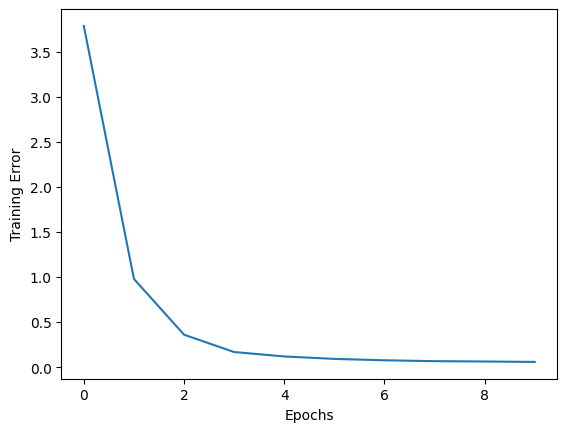

In [84]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training Error')

In [85]:
Model1.evaluate([test.user_id_new,test.busi_id_new],test.stars)

125/125 [==============================] - 0s 1ms/step - loss: 1.8973


1.897288203239441

In [86]:
predictions = Model1.predict([test.user_id_new.head(10),test.busi_id_new.head(10)])

[print(predictions[i], test.stars.iloc[i]) for i in range(0,10)]

1/1 [==============================] - 0s 70ms/step
[4.0723453] 1
[3.2147782] 4
[2.4412131] 1
[4.1558022] 5
[4.268721] 5
[3.150977] 4
[3.1767733] 5
[2.7504003] 5
[4.0725427] 1
[4.3157306] 5


[None, None, None, None, None, None, None, None, None, None]

In [93]:
# weights and shape
weights = Model1.get_weights()
[w.shape for w in weights]

user_embeddings = weights[0]
business_embeddings = weights[1]

busi_id = 2173
print(f"Name of busi_id={busi_id}: {business_df['name'][busi_id]}")

Name of busi_id=2173: The UPS Store


In [94]:
print(f"Embedding vector for item_id={busi_id}")
print(business_embeddings[busi_id])
print("shape:", business_embeddings[busi_id].shape)

Embedding vector for item_id=2173
[ 0.04741497  0.02981143  0.05614844 -0.04717283  0.08545868  0.05650817
 -0.02939682 -0.012057    0.00525004  0.08341138 -0.00246797 -0.01454288
  0.04991484 -0.04083259 -0.02654758 -0.06472719  0.05358512  0.0926936
 -0.07466816 -0.00909847 -0.01411156  0.01344077 -0.09453537 -0.02320256
  0.01286109  0.03650711 -0.03693251 -0.02401582 -0.05717639 -0.01323875
 -0.01125912 -0.05506033 -0.00494131  0.05672998 -0.02139109 -0.02159796
  0.00067218 -0.00747094  0.01343195 -0.03458153  0.02046751  0.08714441
 -0.02707176  0.07548882 -0.00622048 -0.04384924 -0.01656586 -0.06471676
  0.06523328 -0.00643661 -0.00941287  0.00532218 -0.06337955  0.02259502
  0.00929966  0.00803401  0.0755134  -0.05142003 -0.03610789  0.033112
  0.00507518 -0.02949788  0.04000224  0.08288149]
shape: (64,)


In [95]:
EPSILON = 1e-07 
def cosine_similarities(busi_id, business_embeddings):
    """Compute similarities between item_id and all items embeddings"""
    query_vector = business_embeddings[busi_id]
    dot_products = business_embeddings @ query_vector

    query_vector_norm = np.linalg.norm(query_vector)
    all_item_norms = np.linalg.norm(business_embeddings, axis=1)
    norm_products = query_vector_norm * all_item_norms
    return dot_products / (norm_products + EPSILON)


similarities = cosine_similarities(2173, business_embeddings)
similarities

array([ 0.25731876, -0.2325836 ,  0.479848  , ...,  0.26974386,
       -0.10675748, -0.036459  ], dtype=float32)

In [96]:
def most_similar(item_id, item_embeddings, titles,
                 top_n=30):
    sims = cosine_similarities(item_id, item_embeddings)
    # [::-1] makes it possible to reverse the order of a numpy
    # array, this is required because most similar items have
    # a larger cosine similarity value
    sorted_indexes = np.argsort(sims)[::-1]
    idxs = sorted_indexes[0:top_n]
    return list(zip(idxs, titles[idxs], sims[idxs]))


most_similar(2173, business_embeddings, business_df["name"], top_n=10)

[(2173, 'The UPS Store', 0.99999917),
 (3077, 'Mayberry Salon & Barbers', 0.61447096),
 (4097, "Giordano's", 0.6062992),
 (4652, 'Mountain High Outfitters', 0.5725412),
 (1668, 'Silver Bear Swim School', 0.5634155),
 (1655, 'Nancys Cleaning Services Of Santa Barbara', 0.5582139),
 (3031, 'Aprils On Main', 0.5580879),
 (3134, 'Yuli Hair Salon', 0.5555845),
 (2537, 'Endeavor Boutique', 0.5513522),
 (4519, 'Aroma Indian Bistro', 0.5496998)]

In [158]:
#from sklearn.metrics import mean_absolute_error, mean_squared_error

#print("Mean Squared Error (MSE):" , mean_squared_error(initial_train_preds, stars_train))
#print("Mean Absolute Error (MAE):" , mean_absolute_error(initial_train_preds, stars_train))

Mean Squared Error (MSE): 16.520478701578526
Mean Absolute Error (MAE): 3.8334576049205813


In [159]:
#model training
'''
history = model.fit([user_id_train, busi_id_train], stars_train,
                    batch_size=64, epochs=10, validation_split=0.1,
                    shuffle=True)'''

Epoch 1/10
77/77 [==============================] - 1s 7ms/step - loss: 13.5877 - val_loss: 8.4434
Epoch 2/10
77/77 [==============================] - 0s 5ms/step - loss: 3.8528 - val_loss: 3.4186
Epoch 3/10
77/77 [==============================] - 0s 5ms/step - loss: 0.8978 - val_loss: 3.2474
Epoch 4/10
77/77 [==============================] - 0s 6ms/step - loss: 0.2038 - val_loss: 3.3004
Epoch 5/10
77/77 [==============================] - 0s 5ms/step - loss: 0.0979 - val_loss: 3.3301
Epoch 6/10
77/77 [==============================] - 0s 5ms/step - loss: 0.0865 - val_loss: 3.2776
Epoch 7/10
77/77 [==============================] - 0s 6ms/step - loss: 0.0789 - val_loss: 3.3047
Epoch 8/10
77/77 [==============================] - 0s 6ms/step - loss: 0.0714 - val_loss: 3.2582
Epoch 9/10
77/77 [==============================] - 0s 5ms/step - loss: 0.0626 - val_loss: 3.2649
Epoch 10/10
77/77 [==============================] - 0s 5ms/step - loss: 0.0538 - val_loss: 3.2259


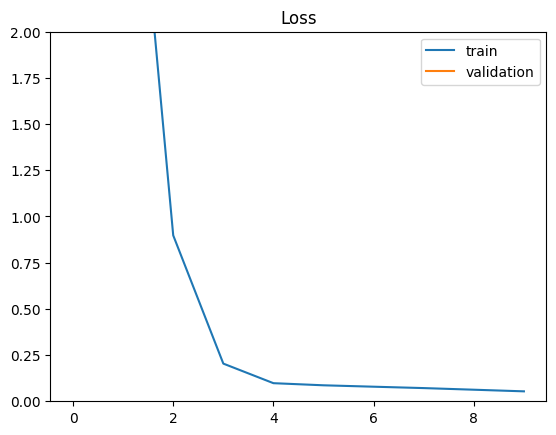

In [160]:
#plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='validation')
#plt.ylim(0, 2)
#plt.legend(loc='best')
#plt.title('Loss');

43/43 [==============================] - 0s 933us/step
Final test MSE: 3.093
Final test MAE: 1.484


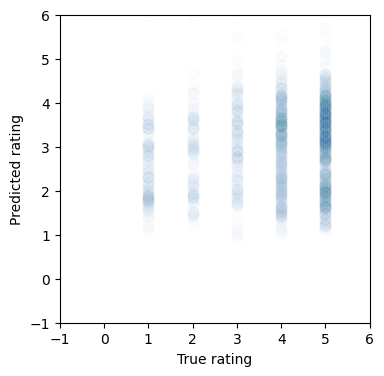

In [161]:
#def plot_predictions(y_true, y_pred):
 #   plt.figure(figsize=(4, 4))
  #  plt.xlim(-1, 6)
   # plt.xlabel("True rating")
    #plt.ylim(-1, 6)
    #plt.ylabel("Predicted rating")
    #plt.scatter(y_true, y_pred, s=60, alpha=0.01)

#test_preds = model.predict([user_id_test, busi_id_test])
#print("Final test MSE: %0.3f" % mean_squared_error(test_preds, stars_test))
#print("Final test MAE: %0.3f" % mean_absolute_error(test_preds, stars_test))
#plot_predictions(stars_test, test_preds)

170/170 [==============================] - 0s 870us/step
Final train MSE: 0.362
Final train MAE: 0.278


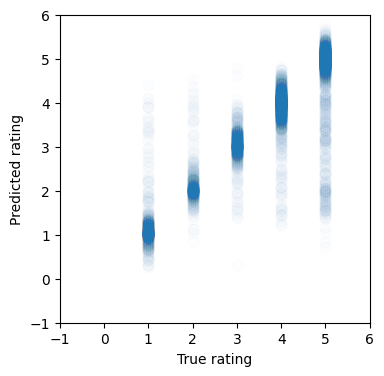

In [162]:
#train_preds = model.predict([user_id_train, busi_id_train])
#print("Final train MSE: %0.3f" % mean_squared_error(train_preds, stars_train))
#print("Final train MAE: %0.3f" % mean_absolute_error(train_preds, stars_train))
#plot_predictions(stars_train, train_preds)

In [ ]:
# Calculate cosine similarities
#restaurant_embedding_layer = model.get_layer('restaurant_embedding')
#restaurant_embeddings = restaurant_embedding_layer.get_weights()[0]